In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('train.csv').set_index('Id')

In [66]:
df.shape

(1460, 80)

In [67]:
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [68]:
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [69]:
drop_cols = list(null_cols[null_cols > 689].index)
df = df.drop(drop_cols, axis=1)

In [70]:
df.shape

(1460, 75)

In [71]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [72]:
null = df[(df['GarageType'].isnull()==True)]
null

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,102,0,0,0,0,6,2009,New,Partial,113000
79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,136500
89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,70,RM,50.0,5250,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,20,0,0,0,0,12,2008,WD,Normal,122000
1408,20,RL,NaN,8780,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2009,WD,Normal,112000
1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2006,WD,Abnorml,92000


In [73]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [75]:
col_names = list(df.columns)

In [76]:
col_names

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',

In [77]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [78]:
low_variance = []
 
for col in df._get_numeric_data():
    minimum = min(df[col])
    ninety_perc = np.percentile(df[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)
 
print(low_variance)

['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [79]:
df = df.drop(low_variance, axis=1)

In [80]:
df.shape

(1460, 69)

In [81]:
stats = df.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,50.00
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,21.00
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,4048.00
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,2.00
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,1.00
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,46.00
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,37.00
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,166.00
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,712.25
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,0.00


In [82]:
outliers = pd.DataFrame(columns=df.columns)
 
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = df[(df[col] < lower) | 
                   (df[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

In [83]:
outliers.shape

(1350, 70)

In [84]:
outliers.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Outlier
10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,Y,0,4,0,1,2008,WD,Normal,118000,MSSubClass
49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,N,0,0,102,6,2009,New,Partial,113000,MSSubClass
57,160,FV,24.0,2645,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,115,0,0,8,2009,WD,Abnorml,172500,MSSubClass
76,180,RM,21.0,1596,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,120,101,0,11,2009,WD,Normal,91000,MSSubClass
88,160,FV,40.0,3951,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,Y,0,234,0,6,2009,New,Partial,164500,MSSubClass


In [85]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 69, dtype: object

In [86]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [87]:
df.shape

(1460, 69)

In [88]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [89]:
newdf.shape

(1460, 31)

In [90]:
newdf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,2003.0,2,548,0,61,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,1976.0,2,460,298,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,2001.0,2,608,0,42,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,1998.0,3,642,0,35,272,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,2000.0,3,836,192,84,0,12,2008,250000


In [91]:
newdf.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

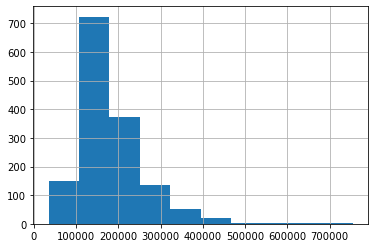

In [92]:
newdf.SalePrice.hist();

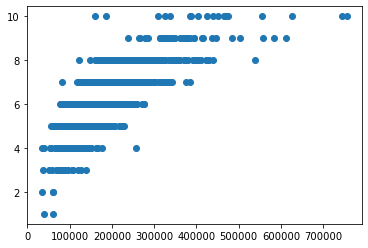

In [93]:
plt.scatter(df.SalePrice,df.OverallQual);

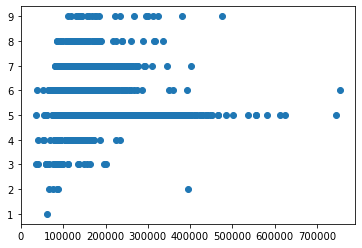

In [94]:
plt.scatter(df.SalePrice,df.OverallCond);

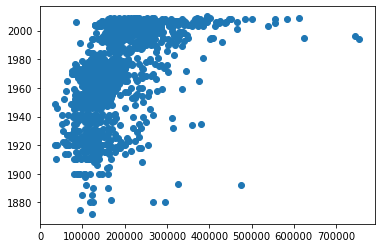

In [95]:
plt.scatter(df.SalePrice,df.YearBuilt);

In [96]:
df_2 = df[['MSZoning', 'LotArea', 'Utilities', 'OverallQual', 
           'OverallCond', 'YearRemodAdd', 'YearBuilt', 'YrSold', 'SalePrice', 'MasVnrArea', ]].copy()

In [97]:
df_2.dtypes

MSZoning         object
LotArea           int64
Utilities        object
OverallQual       int64
OverallCond       int64
YearRemodAdd      int64
YearBuilt         int64
YrSold            int64
SalePrice         int64
MasVnrArea      float64
dtype: object

In [98]:
df_2.head()

,MSZoning,LotArea,Utilities,OverallQual,OverallCond,YearRemodAdd,YearBuilt,YrSold,SalePrice,MasVnrArea
Id,,,,,,,,,,
1,RL,8450,AllPub,7,5,2003,2003,2008,208500,196.0
2,RL,9600,AllPub,6,8,1976,1976,2007,181500,0.0
3,RL,11250,AllPub,7,5,2002,2001,2008,223500,162.0
4,RL,9550,AllPub,7,5,1970,1915,2006,140000,0.0
5,RL,14260,AllPub,8,5,2000,2000,2008,250000,350.0


In [99]:
df_pearson = df[['LotArea', 'YearBuilt', 'YrSold', 'YearRemodAdd', 'SalePrice']].copy()

In [100]:
corr = df_pearson.corr()
corr.style.background_gradient(cmap='coolwarm')

,LotArea,YearBuilt,YrSold,YearRemodAdd,SalePrice
LotArea,1.000000,0.014228,-0.014261,0.013788,0.263843
YearBuilt,0.014228,1.000000,-0.013618,0.592855,0.522897
YrSold,-0.014261,-0.013618,1.000000,0.035743,-0.028923
YearRemodAdd,0.013788,0.592855,0.035743,1.000000,0.507101
SalePrice,0.263843,0.522897,-0.028923,0.507101,1.000000


In [102]:
df_spearman = df[['OverallQual', 'OverallCond', 'SalePrice']].copy()
corr_spearman = df_spearman.corr('spearman')
corr_spearman.style.background_gradient(cmap='coolwarm')

,OverallQual,OverallCond,SalePrice
OverallQual,1.000000,-0.177521,0.809829
OverallCond,-0.177521,1.000000,-0.129325
SalePrice,0.809829,-0.129325,1.000000


In [106]:
def correlation_plot(corr, title="Heatmap"):
  mask = np.zeros_like(df_pearson.corr(), dtype=np.bool)
  # Nos regresa la matriz diagonal superior
  mask[np.triu_indices_from(mask)] = True
  plt.subplots(figsize=(10,8))
  cmap = sns.diverging_palette(6,255, as_cmap=True)
  chart = sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, linewidth = .5, annot = True)
  plt.title(title, fontsize=15)
  return chart

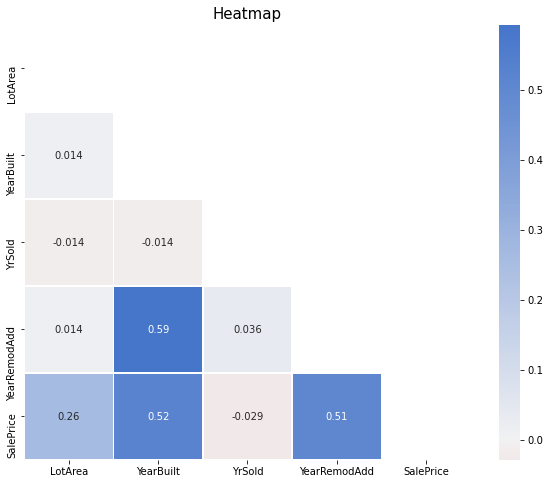

In [107]:
correlation_plot(df_pearson.corr());

In [110]:
def correlation_plot_2(corr, title="Heatmap"):
  mask = np.zeros_like(df_spearman.corr(), dtype=np.bool)
  # Nos regresa la matriz diagonal superior
  mask[np.triu_indices_from(mask)] = True
  plt.subplots(figsize=(10,8))
  cmap = sns.diverging_palette(6,255, as_cmap=True)
  chart = sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, linewidth = .5, annot = True)
  plt.title(title, fontsize=15)
  return chart

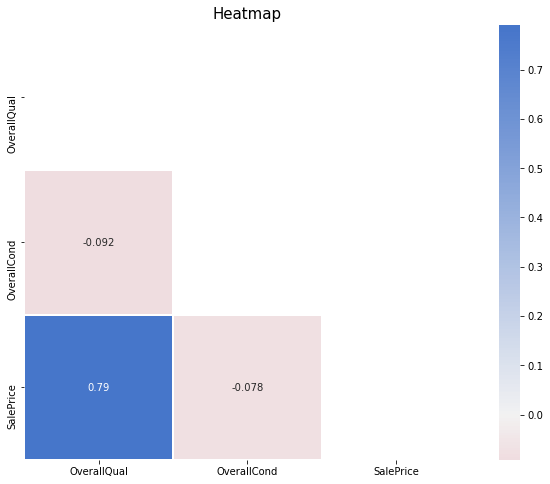

In [111]:
correlation_plot_2(df_spearman.corr());